# Imports

Authentication

In [2]:
from google.cloud import bigquery
from google.colab import auth

auth.authenticate_user()

Libraries

In [48]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import random
from datetime import datetime
from datetime import timedelta
from datetime import date
import numpy as np
from pandas.tseries.offsets import DateOffset
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import warnings

Data import and verification

1. Database

In [4]:
client = bigquery.Client(project='tc-da-1')

2. Tables

2.1. Orders

In [5]:
query = '''
SELECT *
FROM `tc-da-1.olist_db.olist_orders_dataset`
'''

query_job = client.query(query)

df_orders = query_job.to_dataframe()

df_orders.head(11)
df_orders.tail(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99431,7b862ac7558f536ca1c6f388f21d22d5,a708e353cc61e89923883c30fbb8150b,unavailable,2017-10-06 21:30:34+00:00,2017-10-06 21:49:19+00:00,NaT,NaT,2017-10-30 00:00:00+00:00
99432,e444dbf63e18f98c43c81f5ccc7ef8a0,267d85c043aaf0dfbf9b0211546e7a0f,unavailable,2017-09-25 12:12:02+00:00,2017-09-25 12:25:45+00:00,NaT,NaT,2017-10-30 00:00:00+00:00
99433,82492ccd735c628d8a98d08d7ffbe501,5d0b5e5f627d234d7cce220a7a3df097,unavailable,2017-10-18 18:21:48+00:00,2017-10-19 02:49:36+00:00,NaT,NaT,2017-10-30 00:00:00+00:00
99434,8298521946fcd8c9f8b984aad6176694,fc0f896db68de04d75532460d7c4b244,unavailable,2017-03-07 23:02:58+00:00,2017-03-07 23:15:14+00:00,NaT,NaT,2017-04-05 00:00:00+00:00
99435,7ecb6c38b166531663fdecce49dc1a6f,288f90dc3b55afaff2904553fa5cbfe0,unavailable,2017-12-29 00:18:54+00:00,2017-12-30 00:11:18+00:00,NaT,NaT,2018-01-26 00:00:00+00:00
99436,ebb921d271b8b17989e08220637b921f,9ad3cb19919815536d4ae2c46d69279c,unavailable,2018-01-03 21:01:54+00:00,2018-01-03 21:14:27+00:00,NaT,NaT,2018-01-26 00:00:00+00:00
99437,33e13c48e5883f2a3ae2269bf57650c7,cef54c3ad569af033c4ecdaa69c9e140,unavailable,2017-12-22 12:41:34+00:00,2017-12-22 12:52:28+00:00,NaT,NaT,2018-01-26 00:00:00+00:00
99438,ad9a8214948a5bbd4fa03af2ea598a20,921e7175793c295e163d9bd7c8b1c1ee,unavailable,2017-05-07 21:27:38+00:00,2017-05-07 21:42:10+00:00,NaT,NaT,2017-05-31 00:00:00+00:00
99439,24f686e03e134195c83dc3e2b6bf4cd0,8feae4bd81cd90e377f43588b900d3c2,unavailable,2017-05-08 14:20:50+00:00,2017-05-08 14:30:23+00:00,NaT,NaT,2017-05-31 00:00:00+00:00
99440,9a31fd9d697e9670777501f720773fd9,c0a4ca941f313300f1694f4ab73b3651,unavailable,2018-02-15 19:40:00+00:00,2018-02-17 03:47:14+00:00,NaT,NaT,2018-03-23 00:00:00+00:00


In [6]:
row_count = df_orders.shape[0]
print("\nRow count of the entire dataset:", row_count)

null_counts = df_orders.isna().sum()
print("\nNull values in each column:")
print(null_counts)

duplicate_count = df_orders.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:", duplicate_count)


Row count of the entire dataset: 99441

Null values in each column:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Number of duplicate rows in the dataset: 0


2.2. Items

In [7]:
query = '''
SELECT *
FROM `tc-da-1.olist_db.olist_order_items_dataset`
'''
query_job = client.query(query)

df_items = query_job.to_dataframe()

df_items.head(11)
df_items.tail(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112640,df56136b8031ecd28e200bb18e6ddb2e,2,50aa8f292a9510d5542f2a078903a2a7,834f8533b2ecb6598dd004ff3de7203a,2017-01-30 13:15:41+00:00,63.92,15.82
112641,e529c3dca69fcce22a39a059514c4ae7,1,52067b6ad15670cbf03133bb13d2a0a9,6b15924333bd1a741595fe981ea04822,2017-05-17 21:42:35+00:00,63.92,9.34
112642,3c7a723fc09b996f715cfddba2377163,1,e41879396cfe504fa2e6951eb7e5a76c,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-06-02 15:35:22+00:00,95.84,12.92
112643,5f4a93e06fbb6c09a0f4afec6a1ea960,1,f67d6f74c4699f7ccf3bd1c0786901c8,1127b7f2594683f2510f1c2c834a486b,2017-11-21 19:31:34+00:00,119.84,15.60
112644,074eec999695249a1f80e3c7ea1aab01,1,8f7ae8d7845cdabafb4b6f20d8bc5a43,3c03b12bab54d8b37d79d914bfdb1aa0,2018-03-09 11:09:41+00:00,167.68,14.92
112645,0e78cb0dc0e9e34f24bab8c86de949f1,1,8f7ae8d7845cdabafb4b6f20d8bc5a43,3c03b12bab54d8b37d79d914bfdb1aa0,2018-07-31 20:04:38+00:00,167.68,20.36
112646,2285cbcd1e0676fb56344c2844df98b4,1,8f7ae8d7845cdabafb4b6f20d8bc5a43,3c03b12bab54d8b37d79d914bfdb1aa0,2018-02-27 03:31:27+00:00,167.68,14.92
112647,47032972f71019cd453baab392482f5d,1,8f7ae8d7845cdabafb4b6f20d8bc5a43,3c03b12bab54d8b37d79d914bfdb1aa0,2018-01-14 22:31:37+00:00,167.68,14.92
112648,ab7d581904e30270097263608c42ecbf,1,8f7ae8d7845cdabafb4b6f20d8bc5a43,3c03b12bab54d8b37d79d914bfdb1aa0,2018-03-23 07:50:34+00:00,167.68,16.05
112649,b5d3a4b81af25c152a2b6938ed054942,3,8f7ae8d7845cdabafb4b6f20d8bc5a43,3c03b12bab54d8b37d79d914bfdb1aa0,2018-04-30 11:31:31+00:00,167.68,9.47


In [8]:
row_count = df_items.shape[0]
print("\nRow count of the entire dataset:", row_count)

null_counts = df_items.isna().sum()
print("\nNull values in each column:")
print(null_counts)

duplicate_count = df_items.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:", duplicate_count)


Row count of the entire dataset: 112650

Null values in each column:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Number of duplicate rows in the dataset: 0


2.3. Products

In [9]:
query = '''
SELECT *
FROM `tc-da-1.olist_db.olist_products_dataset`
'''
query_job = client.query(query)

df_products = query_job.to_dataframe()

df_products.head(11)
df_products.tail(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32941,83cf2637b3c035693ee58369b791d966,construcao_ferramentas_construcao,48,108,1,7850,50,3,50
32942,638bbb2a5e4f360b71f332ddfebfd672,construcao_ferramentas_construcao,38,143,2,20850,100,25,50
32943,363a9f5b97bf194da23858be722a7aa5,construcao_ferramentas_construcao,44,1455,6,30000,100,50,50
32944,18670ef035870b452690c54a57e13009,construcao_ferramentas_construcao,56,689,1,10050,60,20,50
32945,0bec8ea972e7cf7bf6e81cf9c99c725b,construcao_ferramentas_construcao,55,216,6,11850,50,38,50
32946,5c04d019c44f9f7da2d2b9508871a243,construcao_ferramentas_construcao,58,239,6,16400,50,38,50
32947,b07d64d413a7a5f5dac72fc60b3b14ca,construcao_ferramentas_construcao,58,581,1,50,52,5,52
32948,d89b65ae21c1eed8128aafb8c3c553fe,construcao_ferramentas_construcao,56,952,3,1400,16,16,53
32949,7fb06133a9a56c3d8a2819e9f4d45422,construcao_ferramentas_construcao,54,433,1,1050,16,8,90
32950,26ce5e30e831d1c1e9ac3eeb3a876935,construcao_ferramentas_construcao,42,943,1,16750,35,35,101


In [10]:
row_count = df_products.shape[0]
print("\nRow count of the entire dataset:", row_count)

null_counts = df_products.isna().sum()
print("\nNull values in each column:")
print(null_counts)

duplicate_count = df_products.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:", duplicate_count)


Row count of the entire dataset: 32951

Null values in each column:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Number of duplicate rows in the dataset: 0


2.4. Translate

In [11]:
query = '''
SELECT *
FROM `tc-da-1.olist_db.product_category_name_translation`
'''
query_job = client.query(query)

df_translate = query_job.to_dataframe()

df_translate.head(11)
df_translate.tail(10)

,string_field_0,string_field_1
62,musica,music
63,casa_conforto_2,home_comfort_2
64,portateis_casa_forno_e_cafe,small_appliances_home_oven_and_coffee
65,cds_dvds_musicais,cds_dvds_musicals
66,dvds_blu_ray,dvds_blu_ray
67,flores,flowers
68,artes_e_artesanato,arts_and_craftmanship
69,fraldas_higiene,diapers_and_hygiene
70,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
71,seguros_e_servicos,security_and_services


In [12]:
row_count = df_translate.shape[0]
print("\nRow count of the entire dataset:", row_count)

null_counts = df_translate.isna().sum()
print("\nNull values in each column:")
print(null_counts)

duplicate_count = df_translate.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:", duplicate_count)


Row count of the entire dataset: 72

Null values in each column:
string_field_0    0
string_field_1    0
dtype: int64

Number of duplicate rows in the dataset: 0


Merged tables

1. Data merge and calculation for Pareto analysis

In [13]:
df_translate.rename(columns={'string_field_0': 'product_category_name', 'string_field_1': 'category_name'}, inplace=True)

df_merged = pd.merge(df_items, df_products, on='product_id', how='left')

df_merged['revenue'] = (df_merged['price'] + df_merged['freight_value']).round(2)

df_merged = pd.merge(df_merged, df_translate, on='product_category_name', how='inner')

revenue_by_category = df_merged.groupby('category_name')['revenue'].sum().reset_index()

revenue_by_category = revenue_by_category.sort_values(by='revenue', ascending=False)

revenue_by_category['running_total'] = revenue_by_category['revenue'].cumsum()
revenue_by_category['total'] = revenue_by_category['revenue'].sum()
revenue_by_category['percent_of_total'] = revenue_by_category['running_total'] / revenue_by_category['total']

print("Final DataFrame with corrected running_total calculation:")
revenue_by_category

Final DataFrame with corrected running_total calculation:


,category_name,revenue,running_total,total,percent_of_total
43,health_beauty,1441248.07,1441248.07,15629890.34,0.092211
70,watches_gifts,1305541.61,2746789.68,15629890.34,0.175740
7,bed_bath_table,1241681.72,3988471.40,15629890.34,0.255182
65,sports_leisure,1156656.48,5145127.88,15629890.34,0.329185
15,computers_accessories,1059272.40,6204400.28,15629890.34,0.396957
...,...,...,...,...,...
35,flowers,1598.91,15626774.90,15629890.34,0.999801
46,home_comfort_2,1170.58,15627945.48,15629890.34,0.999876
11,cds_dvds_musicals,954.99,15628900.47,15629890.34,0.999937
29,fashion_childrens_clothes,665.36,15629565.83,15629890.34,0.999979


In [14]:
total_revenue = revenue_by_category['revenue'].sum()

print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $15,629,890.34


2. For RFM and Cohort

2.1. Use df_orders

In [15]:
columns_to_keep = ['order_id', 'order_status', 'order_purchase_timestamp']

df_rfm_delivered = df_orders[df_orders['order_status'] == 'delivered'][columns_to_keep]

print("Filtered DataFrame with 'delivered' orders:")
df_rfm_delivered.head()

Filtered DataFrame with 'delivered' orders:


,order_id,order_status,order_purchase_timestamp
2053,c158e9806f85a33877bdfd4f607b72e7,delivered,2017-04-14 22:06:32+00:00
2054,b60b53ad0bb7dacacf2989fe27ad567a,delivered,2017-05-10 14:03:27+00:00
2055,c830f223aae08493ebecb52f29aa48ca,delivered,2017-04-22 15:50:30+00:00
2056,a8aa2cd070eeac7e4368cae3d8222e2b,delivered,2017-05-09 17:42:45+00:00
2057,813c55ce9b6baa8f879e064fbfbc9e07,delivered,2017-04-26 01:01:39+00:00


In [16]:
num_rows = df_rfm_delivered.shape[0]

print("Number of rows in the DataFrame:", num_rows)

Number of rows in the DataFrame: 96478


2.2. Merge data and find duplicates

In [17]:
columns_to_keep_orders = ['order_id', 'order_status', 'order_purchase_timestamp']

df_rfm_delivered = df_orders[df_orders['order_status'] == 'delivered'][columns_to_keep_orders]

columns_to_merge_items = ['order_id', 'product_id', 'price', 'seller_id']

df_merged = pd.merge(df_rfm_delivered, df_items[columns_to_merge_items], on='order_id', how='left')

print("Merged DataFrame with 'delivered' orders and relevant columns from df_items:")
df_merged.head()

Merged DataFrame with 'delivered' orders and relevant columns from df_items:


,order_id,order_status,order_purchase_timestamp,product_id,price,seller_id
0,c158e9806f85a33877bdfd4f607b72e7,delivered,2017-04-14 22:06:32+00:00,c388aa3cdd554588ebcc869156381ba3,79.9,9bcdfa7b615b3abb9461d9e3ad9886ae
1,b60b53ad0bb7dacacf2989fe27ad567a,delivered,2017-05-10 14:03:27+00:00,2b80e83f77008f81ae402882631eba97,292.0,aba1721a889e04decc910aa13b768ef4
2,c830f223aae08493ebecb52f29aa48ca,delivered,2017-04-22 15:50:30+00:00,99a4788cb24856965c36a24e339b6058,89.9,4a3ca9315b744ce9f8e9374361493884
3,a8aa2cd070eeac7e4368cae3d8222e2b,delivered,2017-05-09 17:42:45+00:00,0a27be3536127164b11173c57f14a2da,219.9,fe2032dab1a61af8794248c8196565c9
4,813c55ce9b6baa8f879e064fbfbc9e07,delivered,2017-04-26 01:01:39+00:00,a2446206efccf04cc7fd1511be0ee157,279.9,a888faf2d1baececa6baf9c3d603ee1f


In [18]:
num_rows = df_merged.shape[0]

print("Number of rows in the merged DataFrame:", num_rows)

Number of rows in the merged DataFrame: 110197


In [19]:
subset_columns = ['order_id', 'product_id', 'seller_id', 'price', 'order_purchase_timestamp']

identical_duplicates = df_merged[df_merged.duplicated(subset=subset_columns, keep=False)]

print("Identical Duplicate Rows based on Subset:")
identical_duplicates

Identical Duplicate Rows based on Subset:


,order_id,order_status,order_purchase_timestamp,product_id,price,seller_id
11,3b97562c3aee8bdedcb5c2e45a50d5e1,delivered,2017-04-14 22:21:54+00:00,8c591ab0ca519558779df02023177f44,89.99,a1043bafd471dff536d0c462352beb48
12,3b97562c3aee8bdedcb5c2e45a50d5e1,delivered,2017-04-14 22:21:54+00:00,8c591ab0ca519558779df02023177f44,89.99,a1043bafd471dff536d0c462352beb48
25,4c3812e7963e6b0932c6142e3d6a6b85,delivered,2017-04-19 09:25:15+00:00,e9d4cb776e7adcac31397e6e1778e532,30.90,86ccac0b835037332a596a33b6949ee1
26,4c3812e7963e6b0932c6142e3d6a6b85,delivered,2017-04-19 09:25:15+00:00,e9d4cb776e7adcac31397e6e1778e532,30.90,86ccac0b835037332a596a33b6949ee1
27,4c3812e7963e6b0932c6142e3d6a6b85,delivered,2017-04-19 09:25:15+00:00,e9d4cb776e7adcac31397e6e1778e532,30.90,86ccac0b835037332a596a33b6949ee1
...,...,...,...,...,...,...
110133,8f730a0eecbb6db8ee92ebb91e8f38b1,delivered,2018-02-28 12:17:22+00:00,3abb0e27cb9374f334c59074d868bcbe,79.90,ca77545ca4d2dfd1431bf61334e2fa3c
110136,3cf387bb14e9db171ccbb9b87ea607bb,delivered,2018-02-27 10:55:42+00:00,36f60d45225e60c7da4558b070ce4b60,67.90,88460e8ebdecbfecb5f9601833981930
110137,3cf387bb14e9db171ccbb9b87ea607bb,delivered,2018-02-27 10:55:42+00:00,36f60d45225e60c7da4558b070ce4b60,67.90,88460e8ebdecbfecb5f9601833981930
110141,9f2b23380dcf7e8f6984dbbf19bb3e3f,delivered,2018-03-01 15:13:05+00:00,ee57070aa3b24a06fdd0e02efd2d757d,74.90,f457c46070d02cadd8a68551231220dd


2.3. Drop identical duplicates

In [20]:
df_merged_unique = df_merged.drop_duplicates(subset=['order_id', 'product_id', 'seller_id', 'price', 'order_purchase_timestamp'], keep='last')

print("DataFrame after dropping duplicates:")
df_merged_unique.head()

DataFrame after dropping duplicates:


,order_id,order_status,order_purchase_timestamp,product_id,price,seller_id
0,c158e9806f85a33877bdfd4f607b72e7,delivered,2017-04-14 22:06:32+00:00,c388aa3cdd554588ebcc869156381ba3,79.9,9bcdfa7b615b3abb9461d9e3ad9886ae
1,b60b53ad0bb7dacacf2989fe27ad567a,delivered,2017-05-10 14:03:27+00:00,2b80e83f77008f81ae402882631eba97,292.0,aba1721a889e04decc910aa13b768ef4
2,c830f223aae08493ebecb52f29aa48ca,delivered,2017-04-22 15:50:30+00:00,99a4788cb24856965c36a24e339b6058,89.9,4a3ca9315b744ce9f8e9374361493884
3,a8aa2cd070eeac7e4368cae3d8222e2b,delivered,2017-05-09 17:42:45+00:00,0a27be3536127164b11173c57f14a2da,219.9,fe2032dab1a61af8794248c8196565c9
4,813c55ce9b6baa8f879e064fbfbc9e07,delivered,2017-04-26 01:01:39+00:00,a2446206efccf04cc7fd1511be0ee157,279.9,a888faf2d1baececa6baf9c3d603ee1f


In [21]:
row_count_after_dropping_duplicates = len(df_merged_unique)
print(f"Number of rows after dropping duplicates: {row_count_after_dropping_duplicates}")

Number of rows after dropping duplicates: 100196


2.4. Sum orders with different products

In [22]:
df_sum_by_order_id = df_merged_unique.groupby(['order_id', 'order_purchase_timestamp', 'seller_id'])['price'].sum().reset_index()

print("DataFrame with 'price' summed by 'order_id', 'order_purchase_timestamp', and 'seller_id':")
df_sum_by_order_id.head()

DataFrame with 'price' summed by 'order_id', 'order_purchase_timestamp', and 'seller_id':


,order_id,order_purchase_timestamp,seller_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02+00:00,48436dade18ac8b2bce089ec2a041202,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06+00:00,dd7ddc04e1b6c2c614352b383efe2d36,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31+00:00,5b51032eddd242adc84c38acab88f23d,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35+00:00,9d7a1d34a5052409006425275ba1c2b4,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51+00:00,df560393f3a51e74553ab94004ba5c87,199.90


In [23]:
row_count = df_sum_by_order_id.shape[0]

print("Number of rows in df_sum_by_order_id:", row_count)

Number of rows in df_sum_by_order_id: 97819


In [24]:
unique_order_ids = df_sum_by_order_id['order_id'].nunique()

print("Number of unique order IDs in df_sum_by_order_id:", unique_order_ids)

Number of unique order IDs in df_sum_by_order_id: 96478


In [25]:
unique_sellers_count = df_sum_by_order_id['seller_id'].nunique()

print("Number of unique seller_id values:", unique_sellers_count)

Number of unique seller_id values: 2970


= After merging data and dropping dublicates Number of unique order IDs in df_sum_by_order_id: 96478 and it matches the original Orders db Number of rows in the DataFrame: 96478.

Define function

In [26]:
def apply_styles(row):
    return [colors.get(row['order_year'], '')] * len(row)

def calculate_f_score(x):
    if x <= f25:
        return 1
    elif x <= f50:
        return 2
    elif x <= f75:
        return 3
    else:
        return 4

def calculate_m_score(x):
    if x <= m25:
        return 1
    elif x <= m50:
        return 2
    elif x <= m75:
        return 3
    else:
        return 4

def calculate_r_score(x):
    if x <= r25:
        return 4
    elif x <= r50:
        return 3
    elif x <= r75:
        return 2
    else:
        return 1

def assign_segment(row):
    if row['r_score'] == 4 and row['fm_score'] == 4:
        return 'Champions'
    elif row['r_score'] == 4 and row['fm_score'] == 3:
        return 'Loyal Customers'
    elif row['r_score'] == 3 and row['fm_score'] == 4:
        return 'Loyal Customers'
    elif row['r_score'] == 4 and row['fm_score'] == 2:
        return 'Potential Loyalists'
    elif row['r_score'] == 3 and row['fm_score'] == 3:
        return 'Potential Loyalists'
    elif row['r_score'] == 4 and row['fm_score'] == 1:
        return 'Low Value'
    elif row['r_score'] == 3 and row['fm_score'] == 1:
        return 'Low Value'
    elif row['r_score'] == 3 and row['fm_score'] == 2:
        return 'Customers Needing Attention'
    elif row['r_score'] == 2 and row['fm_score'] == 3:
        return 'Customers Needing Attention'
    elif row['r_score'] == 2 and row['fm_score'] == 2:
        return 'Customers Needing Attention'
    elif row['r_score'] == 2 and row['fm_score'] == 1:
        return 'Low Value'
    elif row['r_score'] == 2 and row['fm_score'] == 4:
        return 'At Risk'
    elif row['r_score'] == 1 and row['fm_score'] == 3:
        return 'At Risk'
    elif row['r_score'] == 1 and row['fm_score'] == 4:
        return 'Cant Lose Them'
    elif row['r_score'] == 1 and row['fm_score'] == 2:
        return 'Hibernating'
    elif row['r_score'] == 1 and row['fm_score'] == 1:
        return 'Low Value'
    else:
        return 'Unknown'

# **Payments/Monetization Analyst Graded Task Project**

The main purpose of the task is to use in analysis at least 1 technique which i learnt in this module and at least 2 techniques learnt in previously modules. So the analysis techniques will be:
1. Pareto
2. RFM
3. Cohorts (Retention)

Due to the use of different techniques, the analysis will be divided into two parts - product and seller analysis blocks. For product analysis i will use Pareto technique and for seller analysis i will use RFM and Cohorts (Retention) techniques.

**Problems that the analysis will help to solve:**


**1. From product side** - *Pareto analysis* can help to solve resource allocation, strategic planning, product portfolio management, and understanding the unique contributions of specific categories to overall revenue.

**2. From seller side:**

*   *RFM analysis* can help to solve customer retention strategies, revenue optimization, cost-effective decision making and segment-specific marketing;

*   *Cohort (Retention) analysis* can help to solve cohort-specific insights, identify critical points and strategic timing for interventions.

# **KPIs**

Unique sellers

In [27]:
# @title
df_sum_by_order_id = df_merged_unique.groupby(['order_id', 'order_purchase_timestamp', 'seller_id'])['price'].sum().reset_index()

df_sum_by_order_id['order_purchase_timestamp'] = pd.to_datetime(df_sum_by_order_id['order_purchase_timestamp'])
df_sum_by_order_id['order_year'] = df_sum_by_order_id['order_purchase_timestamp'].dt.year

unique_sellers_by_year = df_sum_by_order_id.groupby('order_year')['seller_id'].nunique().reset_index()
unique_sellers_by_year.columns = ['order_year', 'unique_sellers']

colors = {
    2016: 'background-color: rgb(99, 110, 250)',  # Blue
    2017: 'background-color: rgb(229, 236, 224)',   # Grey
    2018: 'background-color: rgb(255, 0, 0)'       # Red
}

styled_unique_sellers_by_year = unique_sellers_by_year.style.apply(apply_styles, axis=1)

styled_unique_sellers_by_year

,order_year,unique_sellers
0,2016,129
1,2017,1690
2,2018,2330


Count of delivered orders

In [28]:
# @title
df_sum_by_order_id = df_merged_unique.groupby(['order_id', 'order_purchase_timestamp', 'seller_id'])['price'].sum().reset_index()

df_sum_by_order_id['order_purchase_timestamp'] = pd.to_datetime(df_sum_by_order_id['order_purchase_timestamp'])
df_sum_by_order_id['order_year'] = df_sum_by_order_id['order_purchase_timestamp'].dt.year

total_orders_by_year = df_sum_by_order_id.groupby('order_year')['order_id'].count().reset_index()
total_orders_by_year.columns = ['order_year', 'total_orders_count']

colors = {
    2016: 'background-color: rgb(99, 110, 250)',  # Blue
    2017: 'background-color: rgb(229, 236, 224)',   # Grey
    2018: 'background-color: rgb(255, 0, 0)'       # Red
}

styled_total_orders_by_year = total_orders_by_year.style.apply(apply_styles, axis=1)

styled_total_orders_by_year

,order_year,total_orders_count
0,2016,270
1,2017,43927
2,2018,53622


Price amount of delivered orders

In [29]:
# @title
df_sum_by_order_id = df_merged_unique.groupby(['order_id', 'order_purchase_timestamp', 'seller_id'])['price'].sum().reset_index()

df_sum_by_order_id['order_purchase_timestamp'] = pd.to_datetime(df_sum_by_order_id['order_purchase_timestamp'])
df_sum_by_order_id['order_year'] = df_sum_by_order_id['order_purchase_timestamp'].dt.year

total_price_by_year = df_sum_by_order_id.groupby('order_year')['price'].sum().reset_index()
total_price_by_year.columns = ['order_year', 'total_price_amount']

colors = {
    2016: 'background-color: rgb(99, 110, 250)',  # Blue
    2017: 'background-color: rgb(229, 236, 224)',   # Grey
    2018: 'background-color: rgb(255, 0, 0)'       # Red
}

total_price_by_year['total_price_amount'] = total_price_by_year['total_price_amount'].round(2)

styled_total_price_by_year = total_price_by_year.style.format({'total_price_amount': '{:.2f}'}).apply(apply_styles, axis=1)

styled_total_price_by_year

,order_year,total_price_amount
0,2016,37523.26
1,2017,5590232.95
2,2018,6771667.23


**We can observe a clear upward trend in all the numbers over the three years, suggesting a positive business trajectory, possibly driven by increased customer demand, effective marketing, or the inclusion of new sellers.**

# ***1. Product analysis***

# **Visualization for Pareto TOP categories analysis**

In [30]:
# @title
revenue_by_category = revenue_by_category.sort_values(by='revenue', ascending=False)

fig = px.bar(revenue_by_category,
             x='category_name',
             y='revenue',
             labels={'revenue': 'Revenue'},
             color_discrete_map={'revenue': 'blue'},
             title='Pareto Chart - Revenue and Percentage of Total Revenue',
             height=600)

line_chart = go.Scatter(x=revenue_by_category['category_name'],
                       y=revenue_by_category['percent_of_total'],
                       yaxis='y2',
                       mode='lines+markers',
                       name='Percentage of Total Revenue',
                       line=dict(color='red', width=2))

fig.add_trace(line_chart)

fig.update_layout(
    xaxis=dict(title='Product Category', tickangle=45),
    yaxis=dict(title='Revenue'),
    yaxis2=dict(title='Percentage of Total Revenue (%)', overlaying='y', side='right'),
)

fig.show()

**The data confirms the Pareto Principle, where a small number of categories, including health_beauty (9.22% of total revenue), watches_gifts (17.57% of total revenue), and bed_bath_table (25.52% of total revenue), contribute significantly to the overall revenue, making them key areas of focus for the business. The top few categories collectively contribute a substantial percentage, approximately 52.31%, of the total revenue. Additionally, it is notable that the category security_and_services seems to be a standalone category with a unique position, contributing 1% of the total revenue. Further investigation is needed to understand the nature of this category and its significance to the business.**

***The performed Pareto analysis showed that the raised problems can be solved:***

*   Resource allocation - Pareto suggests that a small number of
categories, such as health_beauty, watches_gifts, and bed_bath_table, contribute significantly to the overall revenue. These conclusions can guide the allocation of resources - focusing marketing efforts, inventory management, and product development on these high-impact categories to maximize returns.
*   Strategic planning - by concentrating efforts on the top-performing categories, Olist can enhance its competitive position and ensure sustainable growth. This may involve expanding product lines, improving marketing strategies, or optimizing pricing and promotions in these key areas.
*   Product portfolio management - Olist may decide to streamline their product portfolio by investing more in the successful categories and potentially phasing out or re-evaluating less profitable ones. This action can lead to a more efficient and focused product offering.
*   Understanding the unique contributions of specific categories to overall revenue - the analysis of data also points out the uniqueness of the security_and_services category, contributing 1% of total revenue. Further investigation into this category can help the Olist understand its nature and significance. This exploration may uncover hidden opportunities or reveal areas that require attention and improvement.


# ***2. Seller analysis***

# **RFM analysis**

1. Recency, frequency, monetary

In [31]:
first_sale_timestamps = df_merged_unique.groupby('seller_id')['order_purchase_timestamp'].min().reset_index()
first_sale_timestamps = first_sale_timestamps.rename(columns={'order_purchase_timestamp': 'first_sale_date'})

max_order_purchase_timestamp = df_merged_unique['order_purchase_timestamp'].max()

first_sale_timestamps['recency'] = (pd.to_datetime(max_order_purchase_timestamp, utc=True) -
                                    pd.to_datetime(first_sale_timestamps['first_sale_date'], utc=True)).dt.days

first_last_first_sale_date = first_sale_timestamps[['first_sale_date']].agg(['min', 'max'])
print("First and Last first_sale_date in the entire dataset:")
print(first_last_first_sale_date)

frequency_df = df_merged_unique.groupby('seller_id')['order_id'].nunique().reset_index()
frequency_df = frequency_df.rename(columns={'order_id': 'frequency'})

monetary_df = df_merged_unique.groupby('seller_id')['price'].sum().reset_index()
monetary_df = monetary_df.rename(columns={'price': 'monetary'})

rfm_df = pd.merge(first_sale_timestamps[['seller_id', 'recency']], frequency_df, on='seller_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='seller_id')

print("RFM DataFrame by seller_id:")
rfm_df.head()

First and Last first_sale_date in the entire dataset:
              first_sale_date
min 2016-09-15 12:16:38+00:00
max 2018-08-28 09:26:43+00:00
RFM DataFrame by seller_id:


,seller_id,recency,frequency,monetary
0,0015a82c2db000af6aaaf3ae2ecb0532,336,3,2685.00
1,001cca7ae9ae17fb1caed9dfb1094831,570,195,20550.44
2,002100f778ceb8431b7a1020ff7ab48f,349,50,1216.60
3,003554e2dce176b5555353e4f3555ac8,257,1,120.00
4,004c9cd9d87a3c30c522c48c4fc07416,579,156,18458.99


2. Calculate quantiles and assign scores

In [32]:
f25, f50, f75 = rfm_df['frequency'].quantile([0.25, 0.5, 0.75])
m25, m50, m75 = rfm_df['monetary'].quantile([0.25, 0.5, 0.75])
r25, r50, r75 = rfm_df['recency'].quantile([0.25, 0.5, 0.75])

rfm_df['f_score'] = rfm_df['frequency'].apply(calculate_f_score)
rfm_df['m_score'] = rfm_df['monetary'].apply(calculate_m_score)
rfm_df['r_score'] = rfm_df['recency'].apply(calculate_r_score)

rfm_df['fm_score'] = round((rfm_df['f_score'] + rfm_df['m_score']) / 2)

print("Modified RFM DataFrame:")
rfm_df[['seller_id', 'recency', 'frequency', 'monetary', 'r_score', 'f_score', 'm_score', 'fm_score']].head()

Modified RFM DataFrame:


,seller_id,recency,frequency,monetary,r_score,f_score,m_score,fm_score
0,0015a82c2db000af6aaaf3ae2ecb0532,336,3,2685.00,2,2,3,2.0
1,001cca7ae9ae17fb1caed9dfb1094831,570,195,20550.44,1,4,4,4.0
2,002100f778ceb8431b7a1020ff7ab48f,349,50,1216.60,2,4,3,4.0
3,003554e2dce176b5555353e4f3555ac8,257,1,120.00,3,1,1,1.0
4,004c9cd9d87a3c30c522c48c4fc07416,579,156,18458.99,1,4,4,4.0


3. Segmentation

In [33]:
rfm_df['Segment'] = rfm_df.apply(assign_segment, axis=1)

print("RFM DataFrame with 'Segment' column:")
rfm_df[['seller_id', 'recency', 'frequency', 'monetary', 'r_score', 'f_score', 'm_score', 'fm_score', 'Segment']].head()

RFM DataFrame with 'Segment' column:


,seller_id,recency,frequency,monetary,r_score,f_score,m_score,fm_score,Segment
0,0015a82c2db000af6aaaf3ae2ecb0532,336,3,2685.00,2,2,3,2.0,Customers Needing Attention
1,001cca7ae9ae17fb1caed9dfb1094831,570,195,20550.44,1,4,4,4.0,Cant Lose Them
2,002100f778ceb8431b7a1020ff7ab48f,349,50,1216.60,2,4,3,4.0,At Risk
3,003554e2dce176b5555353e4f3555ac8,257,1,120.00,3,1,1,1.0,Low Value
4,004c9cd9d87a3c30c522c48c4fc07416,579,156,18458.99,1,4,4,4.0,Cant Lose Them


4. Checking segments for "Unknown"

In [34]:
unknown_segment_count = rfm_df[rfm_df['Segment'] == 'Unknown'].shape[0]
print("Number of rows with 'Unknown' segment:", unknown_segment_count)

Number of rows with 'Unknown' segment: 0


5. Checking for segments

In [35]:
seller_counts_by_segment = rfm_df.groupby('Segment')['seller_id'].nunique().reset_index()

total_sellers = rfm_df['seller_id'].nunique()

total_row = pd.DataFrame({'Segment': ['Total'], 'seller_id': [total_sellers]})
seller_counts_by_segment = pd.concat([seller_counts_by_segment, total_row], ignore_index=True)

print("Number of unique seller_id values in each segment and total:")
seller_counts_by_segment

Number of unique seller_id values in each segment and total:


,Segment,seller_id
0,At Risk,371
1,Cant Lose Them,353
2,Champions,44
3,Customers Needing Attention,665
4,Hibernating,208
5,Low Value,585
6,Loyal Customers,248
7,Potential Loyalists,496
8,Total,2970


= After calculation Number of unique seller_id values in each segment and total is 2970 and it matches Number of unique seller_id values: 2970.

# **Visualization of RFM segments**

In [36]:
# @title
rfm_df['Segment'] = rfm_df.apply(assign_segment, axis=1)

segment_data = rfm_df.groupby('Segment').agg({'frequency': 'mean', 'recency': 'mean', 'monetary': 'sum'}).reset_index()

fig = px.scatter(segment_data,
                 x='recency',
                 y='frequency',
                 color='Segment',
                 hover_name='Segment',
                 title='RFM Segments',
                 labels={'frequency': 'Average Frequency', 'recency': 'Average Recency', 'monetary': 'Total Monetary Value'},
                 size='monetary',
                 size_max=50,
                 width=800, height=600)

fig.update_layout(xaxis_title='Average Recency', yaxis_title='Average Frequency')
fig.show()

**The Cant Lose Them segment, representing 48% of the Monetary Value, consists of high-value contributors, contributing almost half of the total monetary value. These sellers exhibit the highest recency among all segments, with an average of 584.04. In the At Risk segment (26% of Monetary Value), sellers contribute significantly to revenue but may require attention to prevent potential churn. The Loyal Customers segment (14% of Monetary Value) also makes a substantial contribution to the total revenue. However, other segments collectively account for only 12% of the Monetary Value. As such, careful consideration is needed to determine whether allocating resources and implementing strategies for these smaller segments is cost-effective.**

***The performed RFM analysis showed that the raised problems can be solved:***

*   Customer Retention Strategies - the segmentation into Cant Lose Them and Loyal Customers segments provides insights into customer loyalty levels. Olist can tailor retention strategies to further solidify relationships with these high-value contributors and encourage continued engagement.
*   Revenue Optimization - by focusing on the high-value contributors within the Cant Lose Them and Loyal Customers segments, Olist can optimize revenue streams. This involves maximizing sales, cross-selling, and upselling to these segments, potentially increasing the overall monetary value they bring to the business.
*   Cost-Effective Decision Making - the RFM analysis prompts a careful consideration of resource allocation and strategy implementation for smaller segments contributing only 12% of the monetary value. Olist may need to evaluate whether the investment in retaining or growing these segments aligns with their overall cost-effectiveness goals.
*   Segment-Specific Marketing - understanding the recency and contribution levels of each segment allows for more targeted and effective marketing efforts. Different segments may require distinct marketing strategies to cater to their specific needs and behaviors.


# **Cohorts (Retention) analysis (2018)**

1. Due to uneven periods in the data set, I chose to perform the analysis only from the year 2018.

In [39]:
df_sum_by_order_id['order_purchase_timestamp'] = pd.to_datetime(df_sum_by_order_id['order_purchase_timestamp'])

df_sum_by_order_id_2018 = df_sum_by_order_id[df_sum_by_order_id['order_purchase_timestamp'].dt.year == 2018]

num_rows_2018 = df_sum_by_order_id_2018.shape[0]

print("Number of rows in the DataFrame for the year 2018:", num_rows_2018)

Number of rows in the DataFrame for the year 2018: 53622


2. Cohort size

In [41]:
first_purchase_timestamp = df_sum_by_order_id_2018.groupby('seller_id')['order_purchase_timestamp'].min()

start_month_df = pd.DataFrame({'seller_id': first_purchase_timestamp.index, 'start_month': first_purchase_timestamp.values}).copy(deep=True)

start_month_df['start_month'] = start_month_df['start_month'].dt.to_period('M')

seller_count_by_start_month = start_month_df.groupby('start_month').size().reset_index(name='seller_count').copy(deep=True)

seller_count_by_start_month

,start_month,seller_count
0,2018-01,956
1,2018-02,223
2,2018-03,172
3,2018-04,231
4,2018-05,190
5,2018-06,200
6,2018-07,193
7,2018-08,165


3. Monthly Cohort analysis

In [51]:
warnings.filterwarnings("ignore", message="Converting to PeriodArray/Index representation will drop timezone information")

first_purchase_timestamp = df_sum_by_order_id_2018.groupby('seller_id')['order_purchase_timestamp'].min()

start_month_df = pd.DataFrame({'seller_id': first_purchase_timestamp.index, 'start_month': first_purchase_timestamp.values})

start_month_df['start_month'] = start_month_df['start_month'].dt.to_period('M')

cohort_df = df_sum_by_order_id_2018[['seller_id', 'order_purchase_timestamp']].copy()
cohort_df['start_month'] = cohort_df['seller_id'].map(start_month_df.set_index('seller_id')['start_month'])
cohort_df['end_month'] = cohort_df['order_purchase_timestamp'].dt.to_period('M')

def calculate_monthly_metrics(group):
    return pd.Series({
        'cohort_size': group['seller_id'].nunique(),
        'month_1': group.loc[(group['start_month'] + 1) == group['end_month'], 'seller_id'].nunique(),
        'month_2': group.loc[(group['start_month'] + 2) == group['end_month'], 'seller_id'].nunique(),
        'month_3': group.loc[(group['start_month'] + 3) == group['end_month'], 'seller_id'].nunique(),
        'month_4': group.loc[(group['start_month'] + 4) == group['end_month'], 'seller_id'].nunique(),
        'month_5': group.loc[(group['start_month'] + 5) == group['end_month'], 'seller_id'].nunique(),
        'month_6': group.loc[(group['start_month'] + 6) == group['end_month'], 'seller_id'].nunique(),
        'month_7': group.loc[(group['start_month'] + 7) == group['end_month'], 'seller_id'].nunique(),
    })

cohorts = cohort_df.groupby('start_month').apply(calculate_monthly_metrics).reset_index()

cohorts['cohort_size'] = cohorts['cohort_size'].astype(int)

cohorts

,start_month,cohort_size,month_1,month_2,month_3,month_4,month_5,month_6,month_7
0,2018-01,956,705,685,659,597,567,539,508
1,2018-02,223,124,119,101,97,108,95,0
2,2018-03,172,96,86,77,66,66,0,0
3,2018-04,231,131,118,117,104,0,0,0
4,2018-05,190,106,104,99,0,0,0,0
5,2018-06,200,111,117,0,0,0,0,0
6,2018-07,193,107,0,0,0,0,0,0
7,2018-08,165,0,0,0,0,0,0,0


4. Visualization of Monthly Cohort Size analysis (2018)

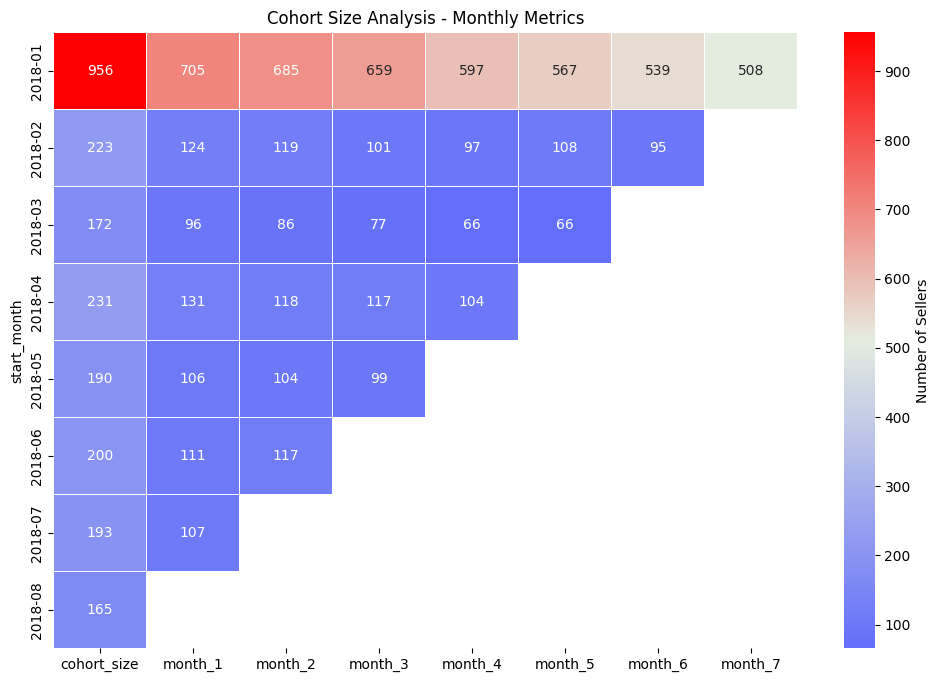

In [52]:
heatmap_data = cohorts.set_index('start_month')[['cohort_size', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7']]
heatmap_data.index = heatmap_data.index.strftime('%Y-%m')

grey_color = (229/255, 236/255, 224/255)
blue_color = (99/255, 110/255, 250/255)
red_color = (255/255, 0/255, 0/255)

cmap = LinearSegmentedColormap.from_list('CustomGradient', [blue_color, grey_color, red_color])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=cmap, linewidths=.5, cbar_kws={"label": "Number of Sellers"}, annot_kws={"size": 10}, mask=(heatmap_data == 0))
plt.title('Cohort Size Analysis - Monthly Metrics')
plt.show()

5. Retention Rate (2018)

In [53]:
cohorts['RR_cohort_size'] = (cohorts['cohort_size'] / cohorts['cohort_size']) * 100
cohorts['RR_month_1'] = (cohorts['month_1'] / cohorts['cohort_size']) * 100
cohorts['RR_month_2'] = (cohorts['month_2'] / cohorts['cohort_size']) * 100
cohorts['RR_month_3'] = (cohorts['month_3'] / cohorts['cohort_size']) * 100
cohorts['RR_month_4'] = (cohorts['month_4'] / cohorts['cohort_size']) * 100
cohorts['RR_month_5'] = (cohorts['month_5'] / cohorts['cohort_size']) * 100
cohorts['RR_month_6'] = (cohorts['month_6'] / cohorts['cohort_size']) * 100
cohorts['RR_month_7'] = (cohorts['month_7'] / cohorts['cohort_size']) * 100

retention_rates = cohorts[['start_month', 'RR_cohort_size', 'RR_month_1', 'RR_month_2', 'RR_month_3', 'RR_month_4', 'RR_month_5', 'RR_month_6', 'RR_month_7']].copy()

retention_rates

,start_month,RR_cohort_size,RR_month_1,RR_month_2,RR_month_3,RR_month_4,RR_month_5,RR_month_6,RR_month_7
0,2018-01,100.0,73.744770,71.652720,68.933054,62.447699,59.309623,56.380753,53.138075
1,2018-02,100.0,55.605381,53.363229,45.291480,43.497758,48.430493,42.600897,0.000000
2,2018-03,100.0,55.813953,50.000000,44.767442,38.372093,38.372093,0.000000,0.000000
3,2018-04,100.0,56.709957,51.082251,50.649351,45.021645,0.000000,0.000000,0.000000
4,2018-05,100.0,55.789474,54.736842,52.105263,0.000000,0.000000,0.000000,0.000000
5,2018-06,100.0,55.500000,58.500000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2018-07,100.0,55.440415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2018-08,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# **Visualization of Retention Rate (2018)**

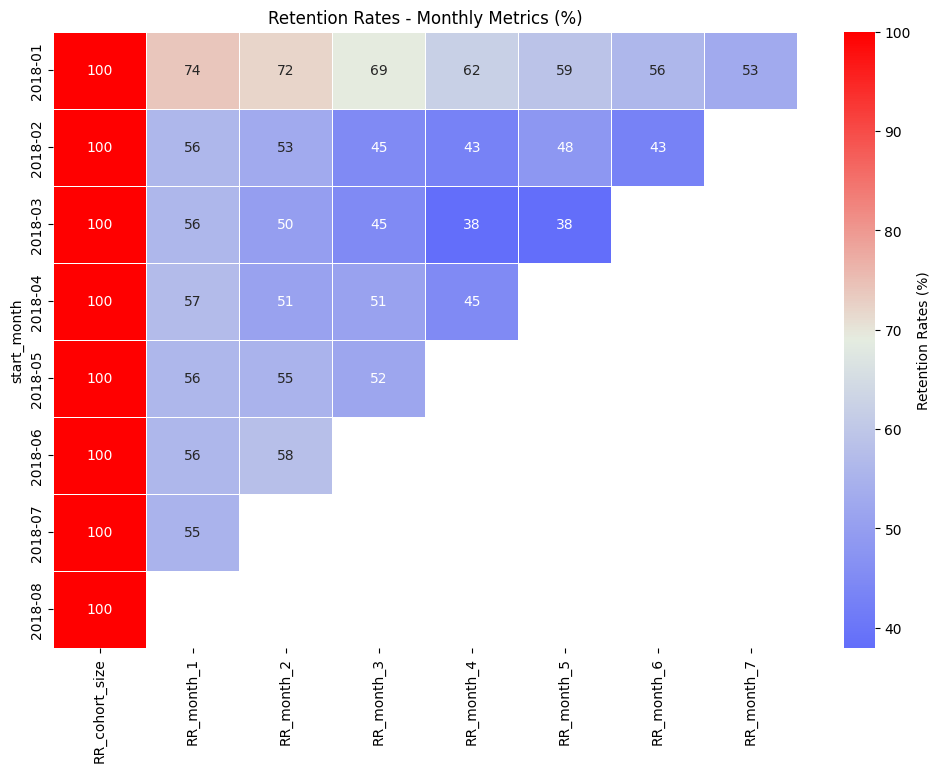

In [54]:
# @title
heatmap_data = cohorts.set_index('start_month')[['cohort_size', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7']]
heatmap_data.index = heatmap_data.index.strftime('%Y-%m')

grey_color = (229/255, 236/255, 224/255)
blue_color = (99/255, 110/255, 250/255)
red_color = (255/255, 0/255, 0/255)

cmap = LinearSegmentedColormap.from_list('CustomGradient', [blue_color, grey_color, red_color])

heatmap_data_rr = retention_rates.set_index('start_month')[['RR_cohort_size', 'RR_month_1', 'RR_month_2', 'RR_month_3', 'RR_month_4', 'RR_month_5', 'RR_month_6', 'RR_month_7']]
heatmap_data_rr.index = heatmap_data_rr.index.strftime('%Y-%m')

heatmap_data_rr = heatmap_data_rr.replace('%', '', regex=True).astype(float)

heatmap_data_rr = heatmap_data_rr.round(0)

mask = heatmap_data_rr == 0

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_rr, annot=True, fmt='.0f', cmap=cmap, linewidths=.5, cbar_kws={"label": "Retention Rates (%)"}, annot_kws={"size": 10}, mask=mask)
plt.title('Retention Rates - Monthly Metrics (%)')
plt.show()

**Retention rates demonstrate a consistent decline across cohorts as time progresses, signifying a natural drop-off in seller engagement over the months. The first cohort (2018-01) exhibits a steady reduction in retention, experiencing a notable 74% drop from month 1 to month 7. The second cohort (2018-02) undergoes a gradual decline, with a 56% decrease from month 1 to month 5. However, a sharper decline occurs from month 5 to month 6 (48%), indicating a potential critical point. Similar to cohort 2018-02, the third cohort (2018-03) faces a noticeable drop in month 6, reaching 38%. The fourth cohort (2018-04) consistently declines, reaching 45% by month 4. The fifth cohort (2018-05) experiences an early challenge in retention, dropping to 55% by month 2. Cohort 2018-06 shows a significant drop from 56% in month 1 to 59% in month 2. While this could be an outlier due to cohort size. Analyzing the percentage drop-offs between consecutive months reveals critical periods for retention, such as the challenging drop from month 4 to month 5 across multiple cohorts.**

***The performed Cohorts (Retention) analysis showed that the raised problems can be solved:***


*   Cohort-Specific Insights - by examining individual cohorts (e.g., 2018-01, 2018-02), the analysis uncovers cohort-specific retention patterns. For instance, the first cohort experiences a significant 74% drop from month 1 to month 7, while the second cohort shows a noticeable decline from month 5 to month 6, suggesting potential critical points for attention.
*   Identifying Critical Points - the analysis points out specific months where retention rates exhibit sharper declines, such as the challenging drop from month 4 to month 5 across multiple cohorts. These critical periods are highlighted as potential areas requiring intervention or adjustments in strategies to improve retention.
*   Strategic Timing for Interventions: Analyzing percentage drop-offs between consecutive months reveals critical periods for retention, such as the challenging drop from month 4 to month 5. This information is valuable for strategically timing interventions or initiatives aimed at improving retention during these crucial periods.

#**Conclusions**

**Conclusions of the analysis of the product:**

1. The top revenue-generating categories are health_beauty, watches_gifts, and bed_bath_table.
While certain categories dominate in revenue, there might be opportunities for optimization and improvement in categories with lower revenue. This could involve targeted marketing, product bundling, or other strategies to boost sales in those areas.

**Conclusions of the analysis of the seller:**

2. Cant Lose Them (48% of Monetary Value), At Risk (26% of Monetary Value) and Loyal Customers (14% of Monetary Value) segments gets 88% of all Monetary Value so the Olist should focus on:

*   maintaining and strengthening relationships with 'Cant Lose Them' sellers through personalized engagement, exclusive benefits, and targeted incentives;
*   implement strategies to re-engage 'At Risk' sellers, such as personalized communications, special promotions, or loyalty programs;
*   on 'Loyal Customers' to continue to nurture and reward the loyalty of this segment through loyalty programs, exclusive offers, and excellent customer service.

3. Cohort (2018-01) exhibits a steady decline in retention this suggests a need for strategies to improve long-term engagement for sellers who joined in January 2018. The second cohort (2018-02) experiences a gradual decline, with drop from month 1 to month 5. And sharper drop from month 5 to month 6, indicating a potential critical point where retention is challenging. Similar to cohort 2018-02, the third cohort (2018-03) faces a noticeable decline in month 6. Identifying the cause of this drop is crucial for improving mid-term retention.
The fourth cohort (2018-04) shows a consistent decline by month 4. Understanding the reasons behind this drop can help formulate targeted interventions.